# Basketball YOLOv8
Dataset obtained in:

https://universe.roboflow.com/roboflow-universe-projects/basketball-players-fy4c2/dataset/25

Version YOLOv8

## Librerías iniciales

In [1]:
#Para limpiar caché
!find . -name "*.pyc" -delete
!find . -name "__pycache__" -type d -exec rm -r {} +

In [2]:
#Ultralytics update
!pip install -U ultralytics

In [3]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Estilo de gráficos a utilizar
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

## Plotting random train samples

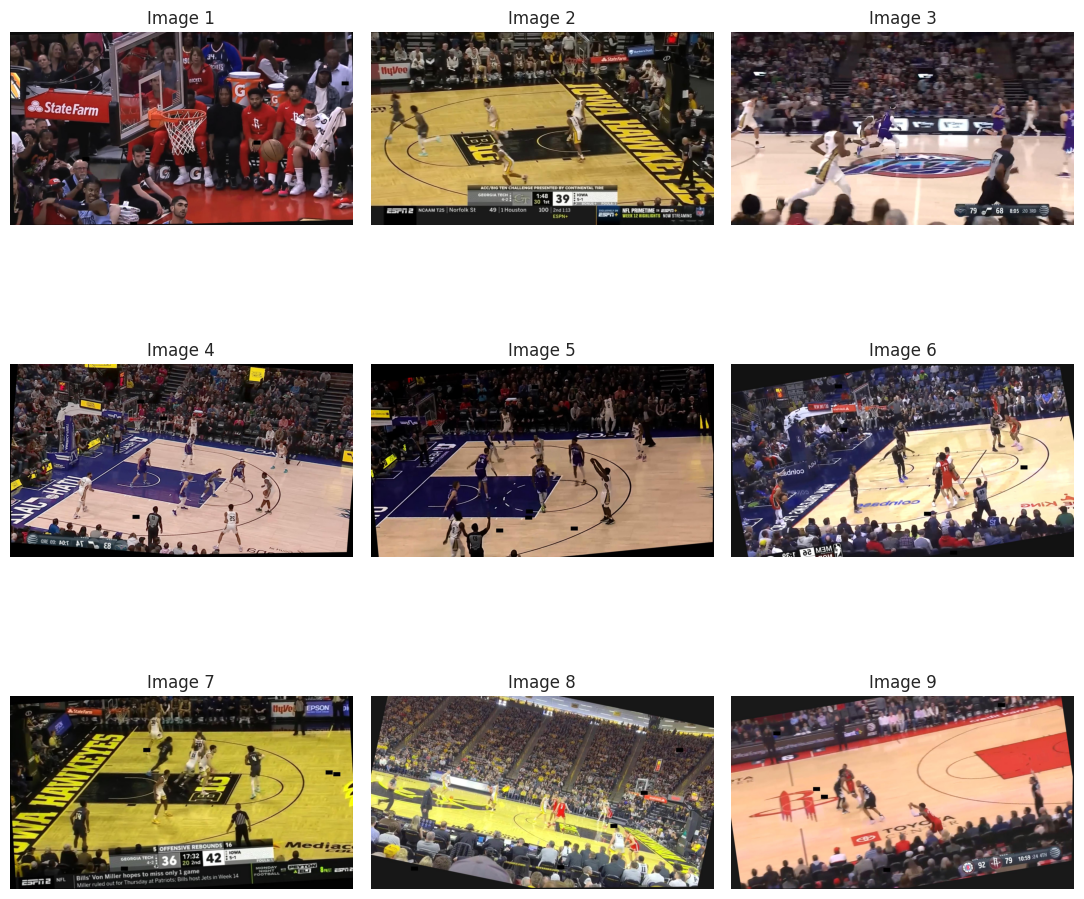

In [5]:
#Image directory for train samples
Image_dir = '/home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images'

#To show samples
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images for plotting
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## YOLOv8 Training

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

In [ ]:
# Use the model to detect object
image = "/home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images/Iowa_Nebraska-2023-03-06-college-men_mp4-84_jpg.rf.d3516153709fa49b1393ee3247f290ba.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
# Build from YAML and transfer weights
Training_model = YOLO('yolov8n.pt')

In [ ]:
#Training
Result_Training_model = Training_model.train(data="/home/alide/Documentos/IA/Proyecto/BasketballYv8/data.yaml",
                                             epochs = 100, batch = 4, optimizer = 'auto')

## Post-training Results

In [ ]:
#Function for showing results
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Could not read image: {image_path}")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/home/alide/Documentos/IA/Proyecto/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

## Best performing model and example

In [7]:
# Loading the best performing model
Final_model = YOLO('/home/alide/Documentos/IA/Proyecto/runs/detect/train3/weights/best.pt')

# Evaluating the model on the validset
metrics = Final_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.105 🚀 Python-3.10.16 torch-2.6.0+cu124 CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/alide/Documentos/IA/Proyecto/BasketballYv8/valid/labels... 1

val: New cache created: /home/alide/Documentos/IA/Proyecto/BasketballYv8/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        100       1509      0.675      0.643       0.65      0.422
                  Ball         68         68      0.574     0.0882      0.181     0.0996
                  Hoop         78         78      0.924      0.897      0.925      0.605
                Period         67         68      0.524      0.559      0.532      0.301
                Player         99        762       0.84       0.87      0.894       0.58
                   Ref         86        189      0.854      0.802      0.887      0.618
            Shot Clock         46         46      0.788      0.404       0.54      0.354
             Team Name         38         76      0.424      0.697      0.508      0.331
           Team Points         80        161      0.557      0.764      0.729       0.49
        Time Remaining         61         61       0.59      0.709      0.651      0.422
Speed: 1.4ms preprocess, 65.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detec

### Exporting the model

In [8]:
#Install dependencies
!pip install onnx
!pip install onnxruntime

In [9]:
#Export the model
Final_model.export(format='onnx')

Ultralytics 8.3.105 🚀 Python-3.10.16 torch-2.6.0+cu124 CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)

PyTorch: starting from '/home/alide/Documentos/IA/Proyecto/runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 13, 8400) (17.6 MB)
requirements: Ultralytics requirement ['onnxslim'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: simplifier failure: No module named 'onnxslim'
ONNX: export success ✅ 0.6s, saved as '/home/alide/Documentos/IA/Proyecto/runs/detect/train3/weights/best.onnx' (11.7 MB)

Export complete (0.9s)
Results saved to /home/alide/Documentos/IA/Proyecto/runs/detect/train3/weights
Predict:         yolo predict task=detect model=/home/alide/Documentos/IA/Proyecto/runs/detect/train3/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/home/alide/Documentos/IA/Proyecto/runs/detect/train3/weights/best.onnx imgs

'/home/alide/Documentos/IA/Proyecto/runs/detect/train3/weights/best.onnx'

### Example using Final_Model with the same img used with the pre trained model


image 1/1 /home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images/Iowa_Nebraska-2023-03-06-college-men_mp4-84_jpg.rf.d3516153709fa49b1393ee3247f290ba.jpg: 384x640 1 Ball, 1 Hoop, 11 Players, 2 Refs, 106.7ms
Speed: 5.2ms preprocess, 106.7ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)


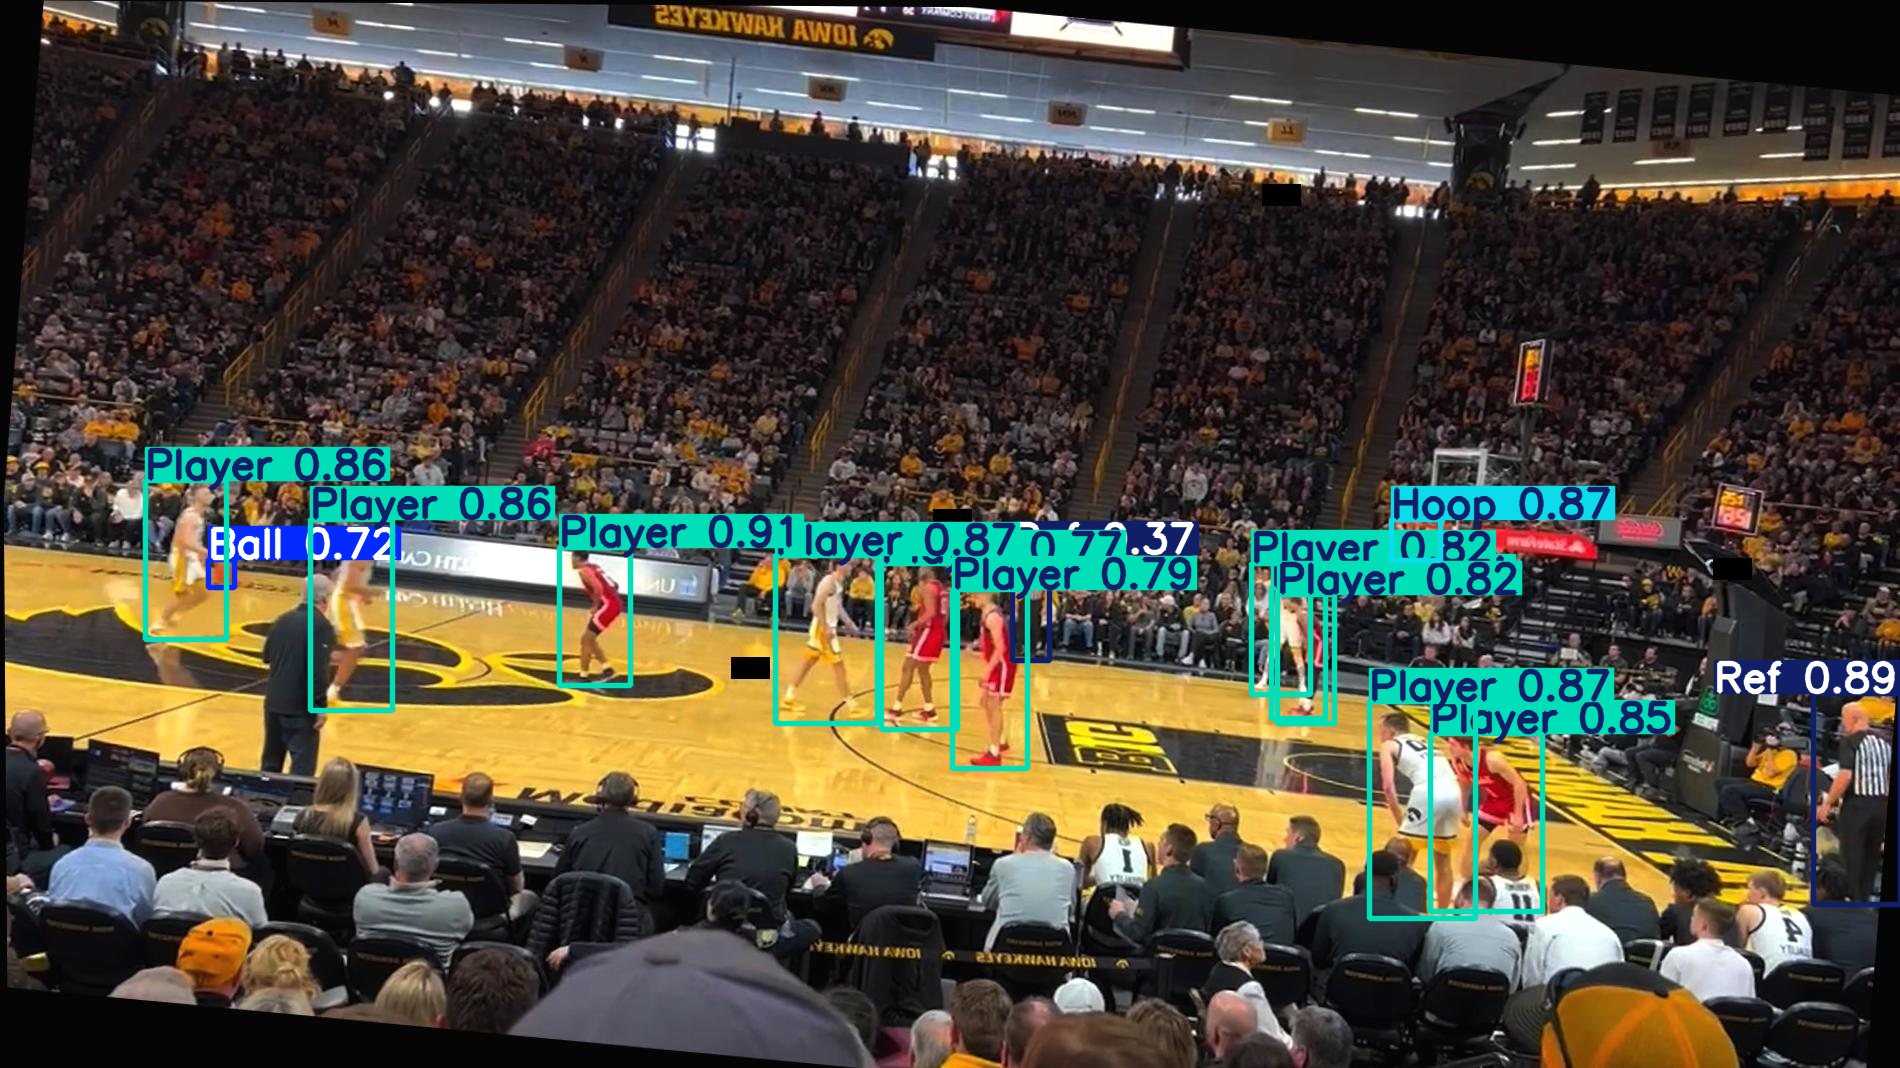

In [10]:
image = "/home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images/Iowa_Nebraska-2023-03-06-college-men_mp4-84_jpg.rf.d3516153709fa49b1393ee3247f290ba.jpg"
result_predict = Final_model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## FInal Model architecture

In [11]:
Final_model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   